### Import the Necessary Libraries

In [46]:
import cv2 as cv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models,datasets,Sequential
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Load the Data

In [47]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### Normalizing the images 

In [48]:
train_images = train_images/ 255
test_images = test_images / 255

### One-hot Encoding on labels

In [49]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [50]:
#class names of cifar10 dataset
class_names = ['Plane','Car','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

### Visualize the Images in 5x5 Grid

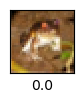

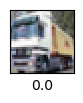

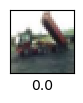

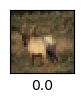

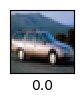

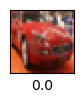

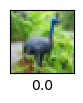

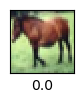

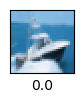

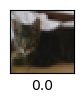

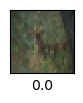

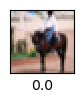

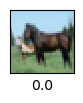

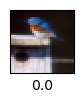

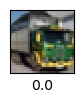

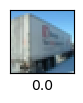

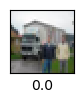

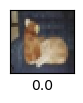

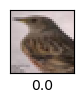

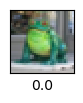

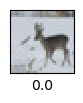

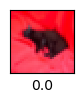

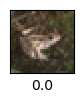

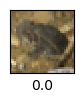

In [51]:
for i in range(24):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i][0])
    plt.show()

### Define the CNN architecture

In [52]:
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

### Create the model

In [53]:
input_shape = train_images.shape[1:]
num_classes = train_labels.shape[1]
model = create_model(input_shape, num_classes)

### Compile the model

In [54]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [55]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
704/704 [==============================] - 23s 29ms/step - loss: 1.6830 - accuracy: 0.3797 - val_loss: 1.3884 - val_accuracy: 0.4986
Epoch 2/10
704/704 [==============================] - 19s 28ms/step - loss: 1.3154 - accuracy: 0.5272 - val_loss: 1.3200 - val_accuracy: 0.5432
Epoch 3/10
704/704 [==============================] - 19s 27ms/step - loss: 1.1652 - accuracy: 0.5869 - val_loss: 1.1075 - val_accuracy: 0.6192
Epoch 4/10
704/704 [==============================] - 19s 27ms/step - loss: 1.0510 - accuracy: 0.6317 - val_loss: 1.0307 - val_accuracy: 0.6356
Epoch 5/10
704/704 [==============================] - 19s 27ms/step - loss: 0.9763 - accuracy: 0.6569 - val_loss: 1.0465 - val_accuracy: 0.6424
Epoch 6/10
704/704 [==============================] - 19s 27ms/step - loss: 0.9133 - accuracy: 0.6789 - val_loss: 0.9339 - val_accuracy: 0.6736
Epoch 7/10
704/704 [==============================] - 20s 28ms/step - loss: 0.8620 - accuracy: 0.6980 - val_loss: 0.9232 - val_accuracy:

### Evaluate the model

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.9065 - accuracy: 0.6958
Test accuracy: 0.6958000063896179


In [57]:
loss,accuracy = model.evaluate(test_images,test_labels)
print('The loss is:',loss)
print('The accuracy of model is:',accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.9065 - accuracy: 0.6958
The loss is: 0.9064512848854065
The accuracy of model is: 0.6958000063896179


In [58]:
# Predict probabilities for test images

predicted_probabilities = model.predict(test_images)

313/313 [==============================] - 3s 10ms/step


In [59]:
# Convert probabilities to class labels

predicted_labels = np.argmax(predicted_probabilities, axis=1)

In [60]:
# Convert one-hot encoded labels back to single integer labels

true_labels = np.argmax(test_labels, axis=1)

### Calculating precision, recall, and F1-score

In [61]:
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7034748532593089
Recall: 0.6958
F1-score: 0.691931865232309


### Generating confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

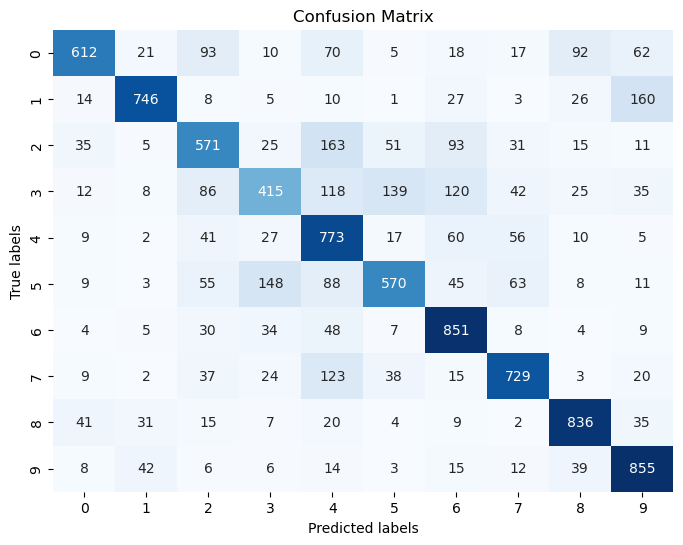

In [62]:
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

### Saving the Model

In [63]:
# Save the model with .keras extension

model.save('image_classifier.keras')

In [64]:
model = models.load_model('image_classifier.keras')

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

### Inputing an Image

In [66]:
# Provide the full path to the image file

img_path = r'C:\Users\DELL\Downloads\deer.jpg'

# Attempt to load the image
img2 = cv.imread(img_path)

# Check if the image was successfully loaded
if img2 is None:
    print("Error: Image not loaded")
else:
    print("Image loaded successfully")

Image loaded successfully


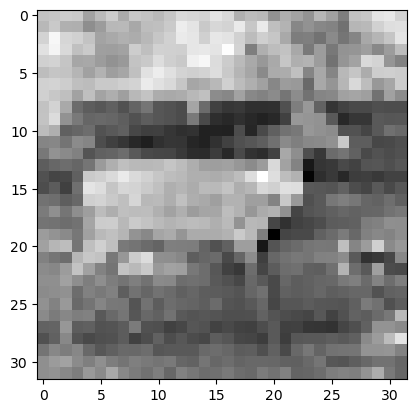

In [67]:
#Inputing Real time image

converted_img = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
plt.imshow(converted_img,cmap=plt.cm.binary)

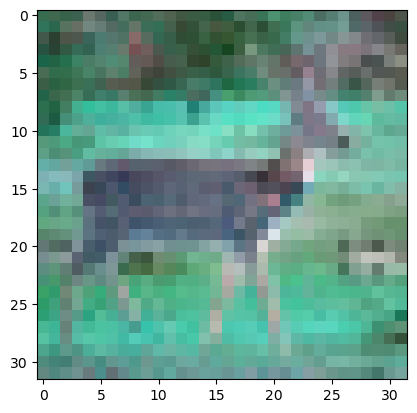

In [68]:
plt.imshow(img2,cmap=plt.cm.binary)

In [69]:
try:
    # Normalize the image data
    img2_normalized = np.array([img2]) / 255.0
    
    # Make predictions
    prediction = model.predict(img2_normalized)
    
    # Get the index of the highest probability
    index = np.argmax(prediction)
    
    print("Predicted class index:", index)
except Exception as e:
    print("Error occurred:", e)

1/1 [==============================] - 0s 223ms/step
Predicted class index: 4


In [70]:
print('The Prediction is:',class_names[index])

The Prediction is: Deer


In [71]:
# Provide the full path to the image file
img_path = r'C:\Users\DELL\Downloads\real_car.jpg'

# Attempt to load the image
img= cv.imread(img_path)

# Check if the image was successfully loaded
if img is None:
    print("Error: Image not loaded")
else:
    print("Image loaded successfully")


Image loaded successfully


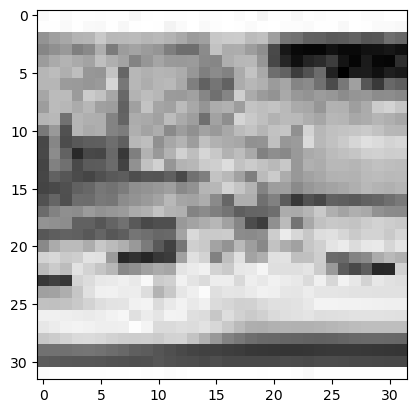

In [72]:
#Inputing Real time image

converted_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(converted_img,cmap=plt.cm.binary)

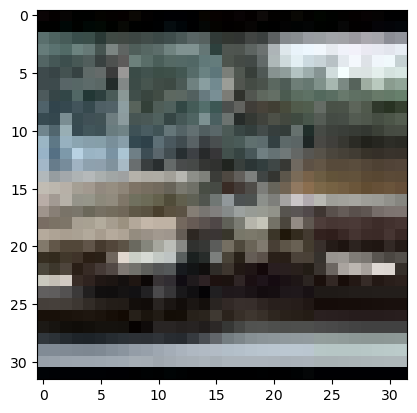

In [73]:
plt.imshow(img,cmap=plt.cm.binary)

In [74]:
try:
    # Normalize the image data
    carimg_normalized = np.array([img]) / 255.0
    
    # Make predictions
    prediction = model.predict(carimg_normalized)
    
    # Get the index of the highest probability
    index = np.argmax(prediction)
    
    print("Predicted class index:", index)
except Exception as e:
    print("Error occurred:", e)

1/1 [==============================] - 0s 63ms/step
Predicted class index: 1


In [75]:
print('The Prediction is:',class_names[index])

The Prediction is: Car
